## Advanced Regression : Shailesh

Surprise Housing - House Prices Prediction

In [976]:
#supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [977]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [978]:
# Importing all datasets
houses = pd.read_csv("train.csv")
houses.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [979]:
# Check the Different attributes of uberdata dataframe
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [980]:
# Check the counts of the columns in uberdata dataframe

houses.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [981]:
#Check the overall count in the dataset

houses.shape

(1460, 81)

In [982]:
#Check the columns names available
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [983]:
# Check the count of Null Values in the Dataset

houses.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [984]:
# Check the % of Records which is null

round(100*houses.isnull().sum()/len(houses.index),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

### We notice that there are nulls in the dataset, hence it makes sense to clean them before performing any analysis

## Step 1 : Data Cleansing

In [985]:
# The values have NA as valid values, hence imputung them with categorical value

houses.loc[pd.isnull(houses['GarageType']), ['GarageType']] = 'NoGarageType'
houses.loc[pd.isnull(houses['GarageFinish']), ['GarageFinish']] = 'NoGarageFin'
houses.loc[pd.isnull(houses['GarageCond']), ['GarageCond']] = 'NoGarageCond'
houses.loc[pd.isnull(houses['GarageQual']), ['GarageQual']] = 'NoGarageQual'
houses.loc[pd.isnull(houses['BsmtFinType2']), ['BsmtFinType2']] = 'NoBsmntFinTyp2'
houses.loc[pd.isnull(houses['BsmtFinType1']), ['BsmtFinType1']] = 'NoBsmntFinTyp1'
houses.loc[pd.isnull(houses['BsmtCond']), ['BsmtCond']] = 'NoBsmntCond'
houses.loc[pd.isnull(houses['BsmtQual']), ['BsmtQual']] = 'NoBsmntQual'
houses.loc[pd.isnull(houses['Alley']), ['Alley']] = 'NoAlley'
houses.loc[pd.isnull(houses['FireplaceQu']), ['FireplaceQu']] = 'NoFirePlaceQu'
houses.loc[pd.isnull(houses['PoolQC']), ['PoolQC']] = 'NoPoolQC'
houses.loc[pd.isnull(houses['MiscFeature']), ['MiscFeature']] = 'NoMiscFeature'
houses.loc[pd.isnull(houses['Fence']), ['Fence']] = 'NoFence'

In [986]:
houses.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  NoAlley      Reg   
1   2          20       RL         80.0     9600   Pave  NoAlley      Reg   
2   3          60       RL         68.0    11250   Pave  NoAlley      IR1   
3   4          70       RL         60.0     9550   Pave  NoAlley      IR1   
4   5          60       RL         84.0    14260   Pave  NoAlley      IR1   

  LandContour Utilities    ...     PoolArea    PoolQC    Fence    MiscFeature  \
0         Lvl    AllPub    ...            0  NoPoolQC  NoFence  NoMiscFeature   
1         Lvl    AllPub    ...            0  NoPoolQC  NoFence  NoMiscFeature   
2         Lvl    AllPub    ...            0  NoPoolQC  NoFence  NoMiscFeature   
3         Lvl    AllPub    ...            0  NoPoolQC  NoFence  NoMiscFeature   
4         Lvl    AllPub    ...            0  NoPoolQC  NoFence  NoMiscFeature   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       0      2   2008        WD         Normal     208500  
1       0      5   2007        WD         Normal     181500  
2       0      9   2008        WD         Normal     223500  
3       0      2   2006        WD        Abnorml     140000  
4       0     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [987]:
# Check the % of Records which is null

round(100*houses.isnull().sum()/len(houses.index),2).sort_values(ascending = False)

LotFrontage      17.74
GarageYrBlt       5.55
BsmtExposure      2.60
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
ExterQual         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
BsmtQual          0.00
ExterCond         0.00
Foundation        0.00
BsmtCond          0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
YearBuilt         0.00
TotalBsmtSF       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
                 ...  
PoolArea          0.00
GarageCars        0.00
PoolQC            0.00
Fence             0.00
MiscFeature       0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
GarageArea        0.00
GarageFinish      0.00
SaleCondition     0.00
FullBath   

In [988]:
# Impute the column with 0 as it has NA's
houses['LotFrontage'].value_counts().sort_values()

137.0      1
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
140.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
152.0      1
97.0       2
134.0      2
313.0      2
129.0      2
118.0      2
174.0      2
122.0      2
101.0      2
114.0      2
116.0      2
        ... 
82.0      12
71.0      12
40.0      12
67.0      12
57.0      12
43.0      12
59.0      13
52.0      14
74.0      15
66.0      15
51.0      15
100.0     16
55.0      17
63.0      17
79.0      17
72.0      17
73.0      18
68.0      19
64.0      19
24.0      19
90.0      23
21.0      23
78.0      25
85.0      40
65.0      44
75.0      53
50.0      57
80.0      69
70.0      70
60.0     143
Name: LotFrontage, Length: 110, dtype: int64

In [989]:
# Impute LotFrontage = 0
houses.loc[pd.isnull(houses['LotFrontage']), ['LotFrontage']] = 0

In [990]:
# Change the value for MasVnrType to 'None'
houses.loc[pd.isnull(houses['MasVnrType']), ['MasVnrType']] = 'None'

In [991]:
# Check the % of Records which is null

round(100*houses.isnull().sum()/len(houses.index),2).sort_values(ascending = False)

GarageYrBlt      5.55
BsmtExposure     2.60
MasVnrArea       0.55
Electrical       0.07
SalePrice        0.00
ExterQual        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
Foundation       0.00
ExterCond        0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
YearRemodAdd     0.00
YearBuilt        0.00
TotalBsmtSF      0.00
OverallCond      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
                 ... 
PoolArea         0.00
GarageCars       0.00
PoolQC           0.00
Fence            0.00
MiscFeature      0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
GarageArea       0.00
GarageFinish     0.00
SaleCondition    0.00
FullBath         0.00
CentralAir       0.00
1stFlrSF  

In [992]:
# Check the values for GarageYrBlt
houses['GarageYrBlt'].sort_values(ascending = False)

987     2010.0
819     2010.0
378     2010.0
762     2009.0
157     2009.0
1217    2009.0
178     2009.0
212     2009.0
87      2009.0
507     2009.0
412     2009.0
898     2009.0
103     2009.0
644     2009.0
914     2009.0
803     2009.0
515     2009.0
1165    2009.0
581     2009.0
798     2009.0
211     2009.0
1267    2009.0
460     2009.0
572     2009.0
1316    2008.0
1157    2008.0
527     2008.0
1036    2008.0
1166    2008.0
678     2008.0
         ...  
954        NaN
960        NaN
968        NaN
970        NaN
976        NaN
1009       NaN
1011       NaN
1030       NaN
1038       NaN
1096       NaN
1123       NaN
1131       NaN
1137       NaN
1143       NaN
1173       NaN
1179       NaN
1218       NaN
1219       NaN
1234       NaN
1257       NaN
1283       NaN
1323       NaN
1325       NaN
1326       NaN
1337       NaN
1349       NaN
1407       NaN
1449       NaN
1450       NaN
1453       NaN
Name: GarageYrBlt, Length: 1460, dtype: float64

#### Create a function to get the age of the house

In [993]:
def Age (year): 
    return (2019-year)

In [994]:
# Create a New column HouseAge which gives the age of the house

houses['HouseAge'] = houses['YrSold'].apply(Age)
houses.drop(['YrSold'], axis = 1, inplace = True)
houses['HouseAge'].sort_values(ascending = False)

327     13
320     13
338     13
1054    13
1056    13
1063    13
668     13
323     13
1068    13
1072    13
1076    13
1077    13
1078    13
1083    13
1046    13
1084    13
314     13
312     13
310     13
1088    13
1089    13
309     13
1093    13
303     13
302     13
1103    13
342     13
345     13
300     13
370     13
        ..
1105     9
1353     9
103      9
762      9
1310     9
412      9
162      9
413      9
1279     9
832      9
158      9
157      9
1283     9
1284     9
419      9
1286     9
532      9
1290     9
1137     9
819      9
147      9
818      9
539      9
1299     9
964      9
142      9
140      9
815      9
812      9
118      9
Name: HouseAge, Length: 1460, dtype: int64

In [995]:
# Create a New column RemodAddAge and get the age of the remod

houses['RemodAddAge'] = houses['YearRemodAdd'].apply(Age)
houses.drop(['YearRemodAdd'], axis = 1, inplace = True)
houses['RemodAddAge'].sort_values(ascending = False)

729     69
522     69
456     69
459     69
985     69
491     69
970     69
495     69
497     69
968     69
1301    69
514     69
533     69
601     69
546     69
555     69
557     69
966     69
563     69
565     69
955     69
1285    69
575     69
576     69
448     69
1321    69
436     69
1323    69
1010    69
1009    69
        ..
591     11
460     10
515     10
1267    10
644     10
283     10
914     10
698     10
798     10
1165    10
103     10
572     10
507     10
178     10
762     10
211     10
212     10
568     10
1451    10
412     10
87      10
803     10
581     10
1217    10
987      9
378      9
855      9
157      9
819      9
898      9
Name: RemodAddAge, Length: 1460, dtype: int64

In [996]:
# Get the Built Age of the House

houses['BuiltAge'] = houses['YearBuilt'].apply(Age)
houses.drop(['YearBuilt'], axis = 1, inplace = True)
houses['BuiltAge'].sort_values(ascending = False)

1349    147
1137    144
304     139
630     139
1132    139
747     139
991     137
106     134
1416    134
945     129
716     129
185     127
1292    127
583     126
809     121
242     119
520     119
1186    119
676     119
488     119
703     119
711     119
921     119
390     119
1062    119
841     115
1393    114
653     113
184     111
848     111
       ... 
1316     11
678      11
453      11
440      11
1181     11
1166     11
798      11
805      11
765      11
1298     11
803      11
412      10
572      10
1217     10
898      10
515      10
157      10
507      10
211      10
87       10
212      10
644      10
460      10
819      10
987      10
1165     10
762      10
914      10
103      10
378       9
Name: BuiltAge, Length: 1460, dtype: int64

In [997]:
#Get the Age of the Garage Built column 

houses['GarageBltAge'] = houses['GarageYrBlt'].apply(Age)
houses['GarageBltAge'].sort_values(ascending = False)

93      119.0
653     113.0
848     111.0
809     109.0
740     109.0
246     109.0
1235    105.0
735     105.0
74      104.0
482     104.0
1443    103.0
1197    103.0
1387    103.0
456     103.0
187     103.0
197     101.0
417     101.0
29       99.0
98       99.0
329      99.0
181      99.0
1186     99.0
1362     99.0
565      99.0
676      99.0
1001     99.0
398      99.0
1120     99.0
1328     99.0
30       99.0
        ...  
954       NaN
960       NaN
968       NaN
970       NaN
976       NaN
1009      NaN
1011      NaN
1030      NaN
1038      NaN
1096      NaN
1123      NaN
1131      NaN
1137      NaN
1143      NaN
1173      NaN
1179      NaN
1218      NaN
1219      NaN
1234      NaN
1257      NaN
1283      NaN
1323      NaN
1325      NaN
1326      NaN
1337      NaN
1349      NaN
1407      NaN
1449      NaN
1450      NaN
1453      NaN
Name: GarageBltAge, Length: 1460, dtype: float64

In [998]:
# Drop the Exisiting Column 
houses.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [999]:
# Impute the NA values to 0
houses.loc[pd.isnull(houses['GarageBltAge']), ['GarageBltAge']] = 0

In [1000]:
# Check the % of Records which is null

round(100*houses.isnull().sum()/len(houses.index),2).sort_values(ascending = False)

BsmtExposure     2.60
MasVnrArea       0.55
Electrical       0.07
BsmtQual         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtCond         0.00
CentralAir       0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
RoofMatl         0.00
RoofStyle        0.00
OverallCond      0.00
LandContour      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
                 ... 
Fence            0.00
MiscFeature      0.00
MiscVal          0.00
MoSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
HouseAge         0.00
RemodAddAge      0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
BedroomAbvGr     0.00
2ndFlrSF         0.00
LowQualFin

In [1001]:
# Imputing the other columns NA columns to the corrsponding names and 0

houses.loc[pd.isnull(houses['BsmtExposure']), ['BsmtExposure']] = 'NoBsmtExposure'
houses.loc[pd.isnull(houses['MasVnrArea']), ['MasVnrArea']] = 0

In [1002]:
# Check the % of Records which is null

round(100*houses.isnull().sum()/len(houses.index),2).sort_values(ascending = False)

Electrical       0.07
CentralAir       0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
RoofMatl         0.00
RoofStyle        0.00
OverallCond      0.00
LandContour      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
                 ... 
Fence            0.00
MiscFeature      0.00
MiscVal          0.00
MoSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
HouseAge         0.00
RemodAddAge      0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
BedroomAbvGr     0.00
2ndFlrSF         0.00
LowQualFin

In [1003]:
# Check the Type of values in Electrical column
houses['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1004]:
# Imputing the Null with Elec
houses.loc[pd.isnull(houses['Electrical']), ['Electrical']] = 'Elec'

In [1005]:
# Check the % of Records which is null

round(100*houses.isnull().sum()/len(houses.index),2).sort_values(ascending = False)

GarageBltAge     0.0
CentralAir       0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
RoofMatl         0.0
RoofStyle        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
                ... 
Fence            0.0
MiscFeature      0.0
MiscVal          0.0
MoSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
HouseAge         0.0
RemodAddAge      0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
BedroomAbvGr     0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

#### Thus the Dataset is cleaned and imputed with 0's and respective categorical columns

### Step 2 - Outlier Treatment

#### 2a. Plot Boxplots for Individual columns

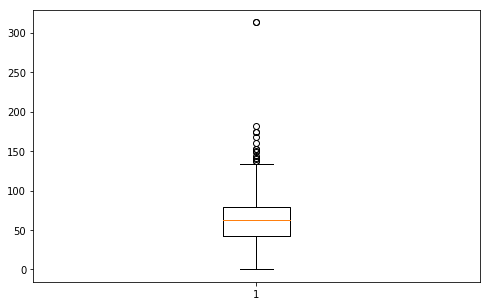

In [1006]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['LotFrontage'])
Q1 = houses.LotFrontage.quantile(0.05)
Q2 = houses.LotFrontage.quantile(0.95)
houses = houses[(houses['LotFrontage'] >= Q1) & (houses['LotFrontage'] <= Q2)]

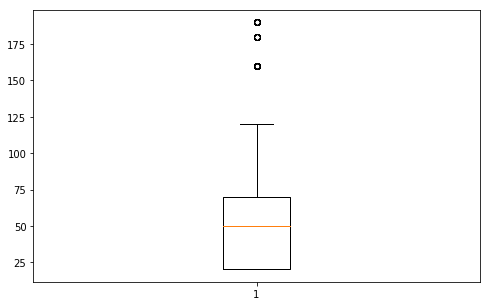

In [1007]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['MSSubClass'])
Q1 = houses.MSSubClass.quantile(0.05)
Q2 = houses.MSSubClass.quantile(0.95)
houses = houses[(houses['MSSubClass'] >= Q1) & (houses['MSSubClass'] <= Q2)]

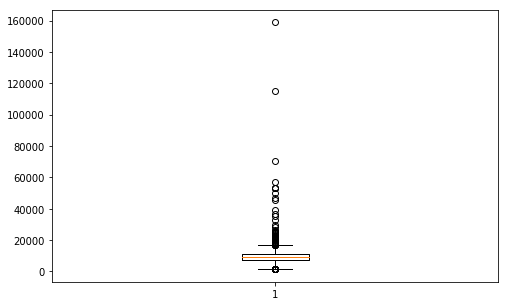

In [1008]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['LotArea'])
Q1 = houses.LotArea.quantile(0.05)
Q2 = houses.LotArea.quantile(0.95)
houses = houses[(houses['LotArea'] >= Q1) & (houses['LotArea'] <= Q2)]

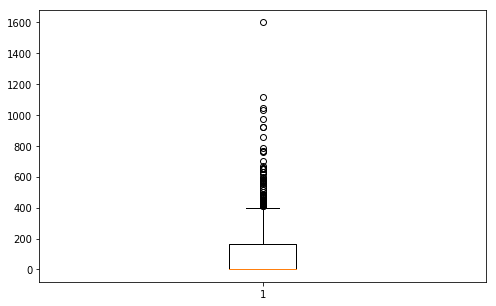

In [1009]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['MasVnrArea'])
Q1 = houses.MasVnrArea.quantile(0.05)
Q2 = houses.MasVnrArea.quantile(0.95)
houses = houses[(houses['MasVnrArea'] >= Q1) & (houses['MasVnrArea'] <= Q2)]

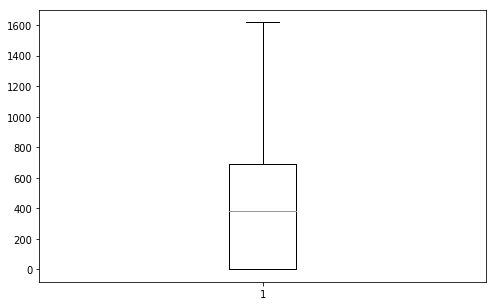

In [1010]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['BsmtFinSF1'])
Q1 = houses.BsmtFinSF1.quantile(0.05)
Q2 = houses.BsmtFinSF1.quantile(0.95)
houses = houses[(houses['BsmtFinSF1'] >= Q1) & (houses['BsmtFinSF1'] <= Q2)]

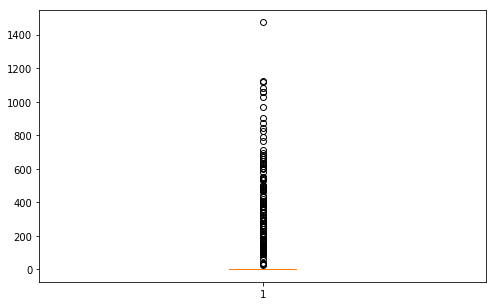

In [1011]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['BsmtFinSF2'])
Q1 = houses.BsmtFinSF2.quantile(0.05)
Q2 = houses.BsmtFinSF2.quantile(0.95)
houses = houses[(houses['BsmtFinSF2'] >= Q1) & (houses['BsmtFinSF2'] <= Q2)]

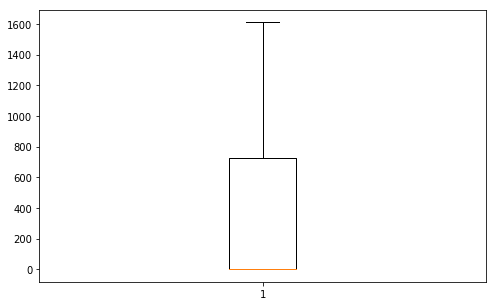

In [1012]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['2ndFlrSF'])
Q1 = houses['2ndFlrSF'].quantile(0.05)
Q2 = houses['2ndFlrSF'].quantile(0.95)
houses = houses[(houses['2ndFlrSF'] >= Q1) & (houses['2ndFlrSF'] <= Q2)]

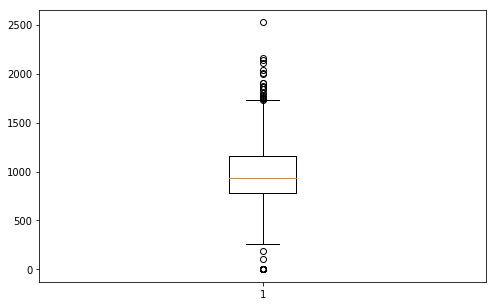

In [1013]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['TotalBsmtSF'])
Q1 = houses['TotalBsmtSF'].quantile(0.05)
Q2 = houses['TotalBsmtSF'].quantile(0.95)
houses = houses[(houses['TotalBsmtSF'] >= Q1) & (houses['TotalBsmtSF'] <= Q2)]

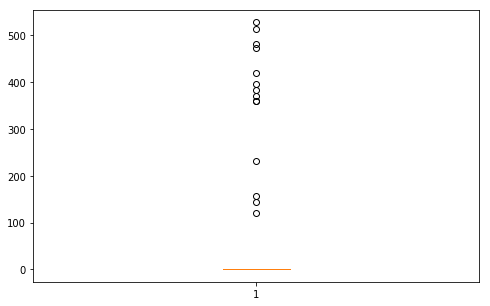

In [1014]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['LowQualFinSF'])
Q1 = houses['LowQualFinSF'].quantile(0.05)
Q2 = houses['LowQualFinSF'].quantile(0.95)
houses = houses[(houses['LowQualFinSF'] >= Q1) & (houses['LowQualFinSF'] <= Q2)]

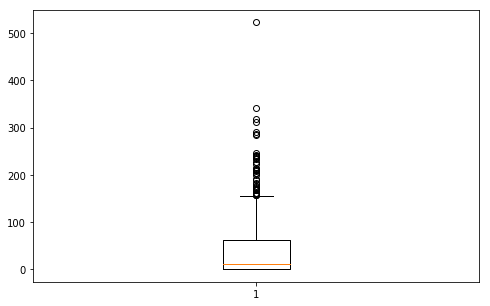

In [1015]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['OpenPorchSF'])
Q1 = houses['OpenPorchSF'].quantile(0.05)
Q2 = houses['OpenPorchSF'].quantile(0.95)
houses = houses[(houses['OpenPorchSF'] >= Q1) & (houses['OpenPorchSF'] <= Q2)]

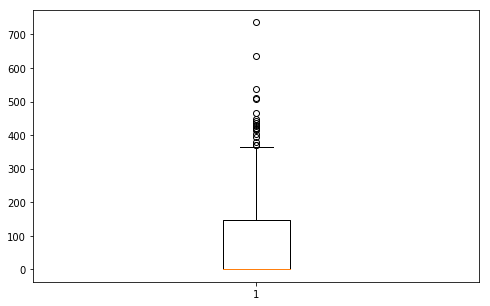

In [1016]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['WoodDeckSF'])
Q1 = houses['WoodDeckSF'].quantile(0.05)
Q2 = houses['WoodDeckSF'].quantile(0.95)
houses = houses[(houses['WoodDeckSF'] >= Q1) & (houses['WoodDeckSF'] <= Q2)]

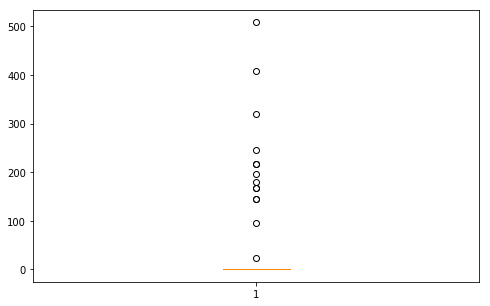

In [1017]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['3SsnPorch'])
Q1 = houses['3SsnPorch'].quantile(0.05)
Q2 = houses['3SsnPorch'].quantile(0.95)
houses = houses[(houses['3SsnPorch'] >= Q1) & (houses['3SsnPorch'] <= Q2)]

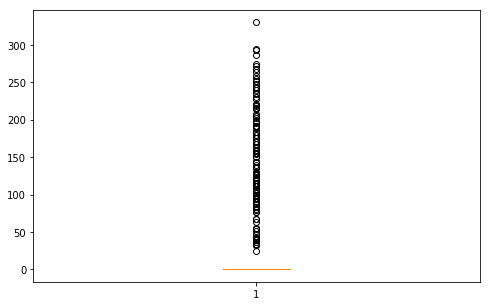

In [1018]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['EnclosedPorch'])
Q1 = houses['EnclosedPorch'].quantile(0.05)
Q2 = houses['EnclosedPorch'].quantile(0.95)
houses = houses[(houses['EnclosedPorch'] >= Q1) & (houses['EnclosedPorch'] <= Q2)]

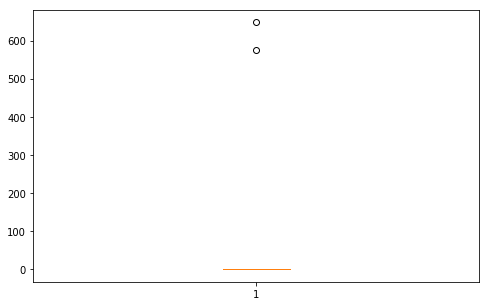

In [1019]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['PoolArea'])
Q1 = houses['PoolArea'].quantile(0.05)
Q2 = houses['PoolArea'].quantile(0.95)
houses = houses[(houses['PoolArea'] >= Q1) & (houses['PoolArea'] <= Q2)]

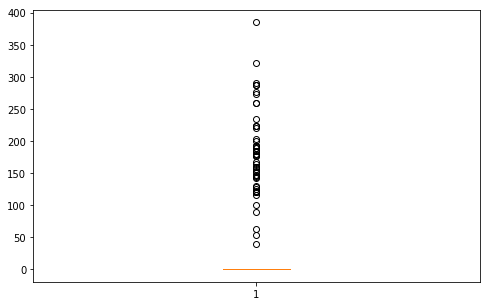

In [1020]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['ScreenPorch'])
Q1 = houses['ScreenPorch'].quantile(0.05)
Q2 = houses['ScreenPorch'].quantile(0.95)
houses = houses[(houses['ScreenPorch'] >= Q1) & (houses['ScreenPorch'] <= Q2)]

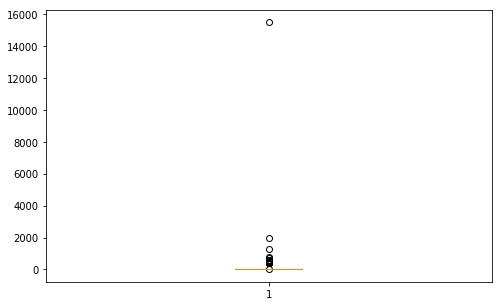

In [1021]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['MiscVal'])
Q1 = houses['MiscVal'].quantile(0.05)
Q2 = houses['MiscVal'].quantile(0.95)
houses = houses[(houses['MiscVal'] >= Q1) & (houses['MiscVal'] <= Q2)]

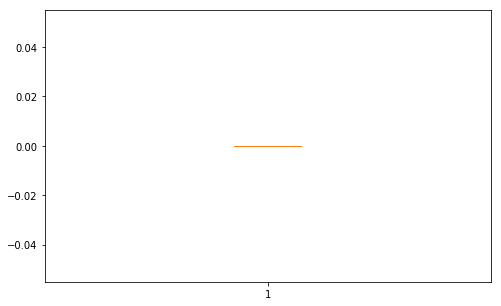

In [1022]:
plt.figure(figsize = (8, 5))
plt.boxplot(houses['PoolArea'])
Q1 = houses['PoolArea'].quantile(0.05)
Q2 = houses['PoolArea'].quantile(0.95)
houses = houses[(houses['PoolArea'] >= Q1) & (houses['PoolArea'] <= Q2)]

#### 2b. Plot Scatter Plots to check the values with the dependent variable

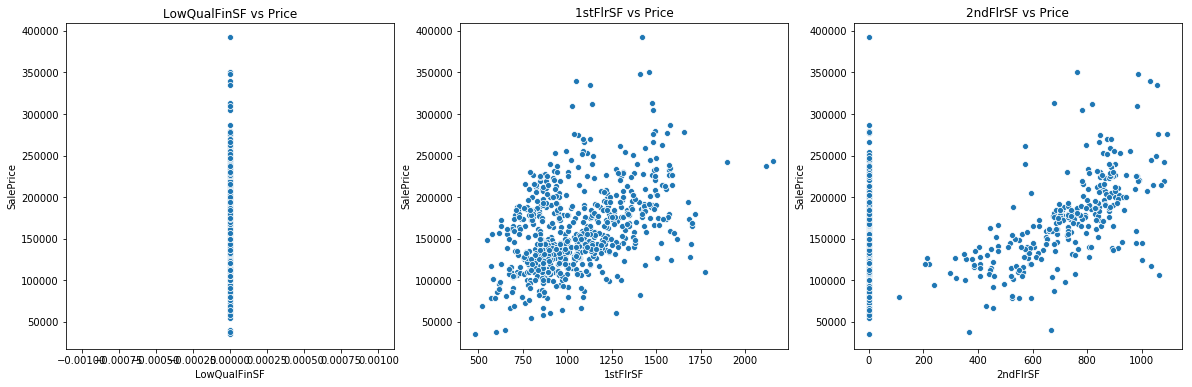

In [1023]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title('LowQualFinSF vs Price')
sns.scatterplot(x=houses['LowQualFinSF'],y=houses.SalePrice)

plt.subplot(1,3,2)
plt.title('1stFlrSF vs Price')
sns.scatterplot(x=houses['1stFlrSF'],y=houses.SalePrice)

plt.subplot(1,3,3)
plt.title('2ndFlrSF vs Price')
sns.scatterplot(x=houses['2ndFlrSF'],y=houses.SalePrice)

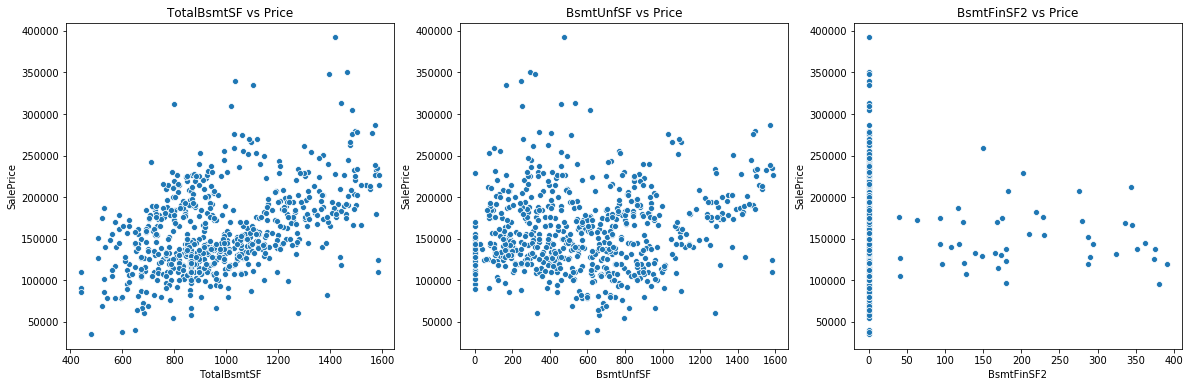

In [1024]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title('TotalBsmtSF vs Price')
sns.scatterplot(x=houses['TotalBsmtSF'],y=houses.SalePrice)

plt.subplot(1,3,2)
plt.title('BsmtUnfSF vs Price')
sns.scatterplot(x=houses['BsmtUnfSF'],y=houses.SalePrice)

plt.subplot(1,3,3)
plt.title('BsmtFinSF2 vs Price')
sns.scatterplot(x=houses['BsmtFinSF2'],y=houses.SalePrice)

In [1025]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title('WoodDeckSF vs Price')
sns.scatterplot(x=houses['WoodDeckSF'],y=houses.SalePrice)

plt.subplot(1,3,2)
plt.title('ScreenPorch vs Price')
sns.scatterplot(x=houses['ScreenPorch'],y=houses.SalePrice)

plt.subplot(1,3,3)
plt.title('OpenPorchSF vs Price')
sns.scatterplot(x=houses['OpenPorchSF'],y=houses.SalePrice)

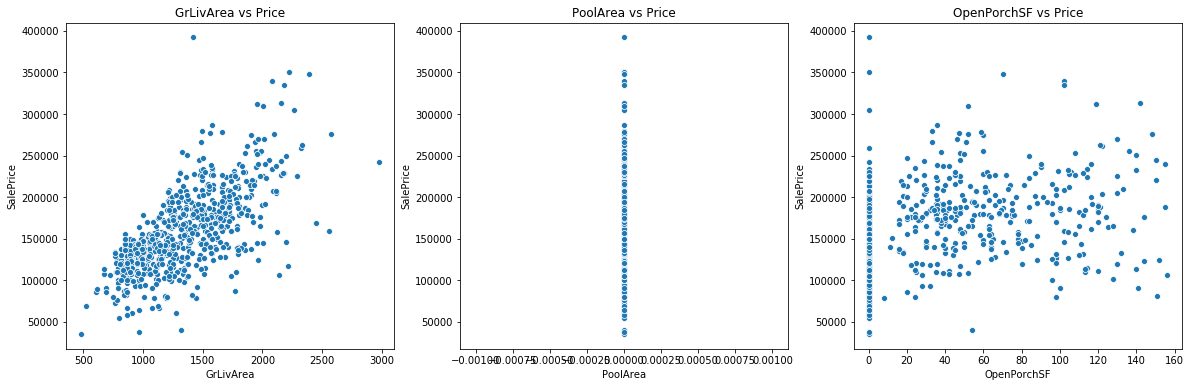

In [1026]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt.title('GrLivArea vs Price')
sns.scatterplot(x=houses['GrLivArea'],y=houses.SalePrice)

plt.subplot(1,3,2)
plt.title('PoolArea vs Price')
sns.scatterplot(x=houses['PoolArea'],y=houses.SalePrice)

plt.subplot(1,3,3)
plt.title('OpenPorchSF vs Price')
sns.scatterplot(x=houses['OpenPorchSF'],y=houses.SalePrice)



#### 2c. Plotting values against the dependent variable

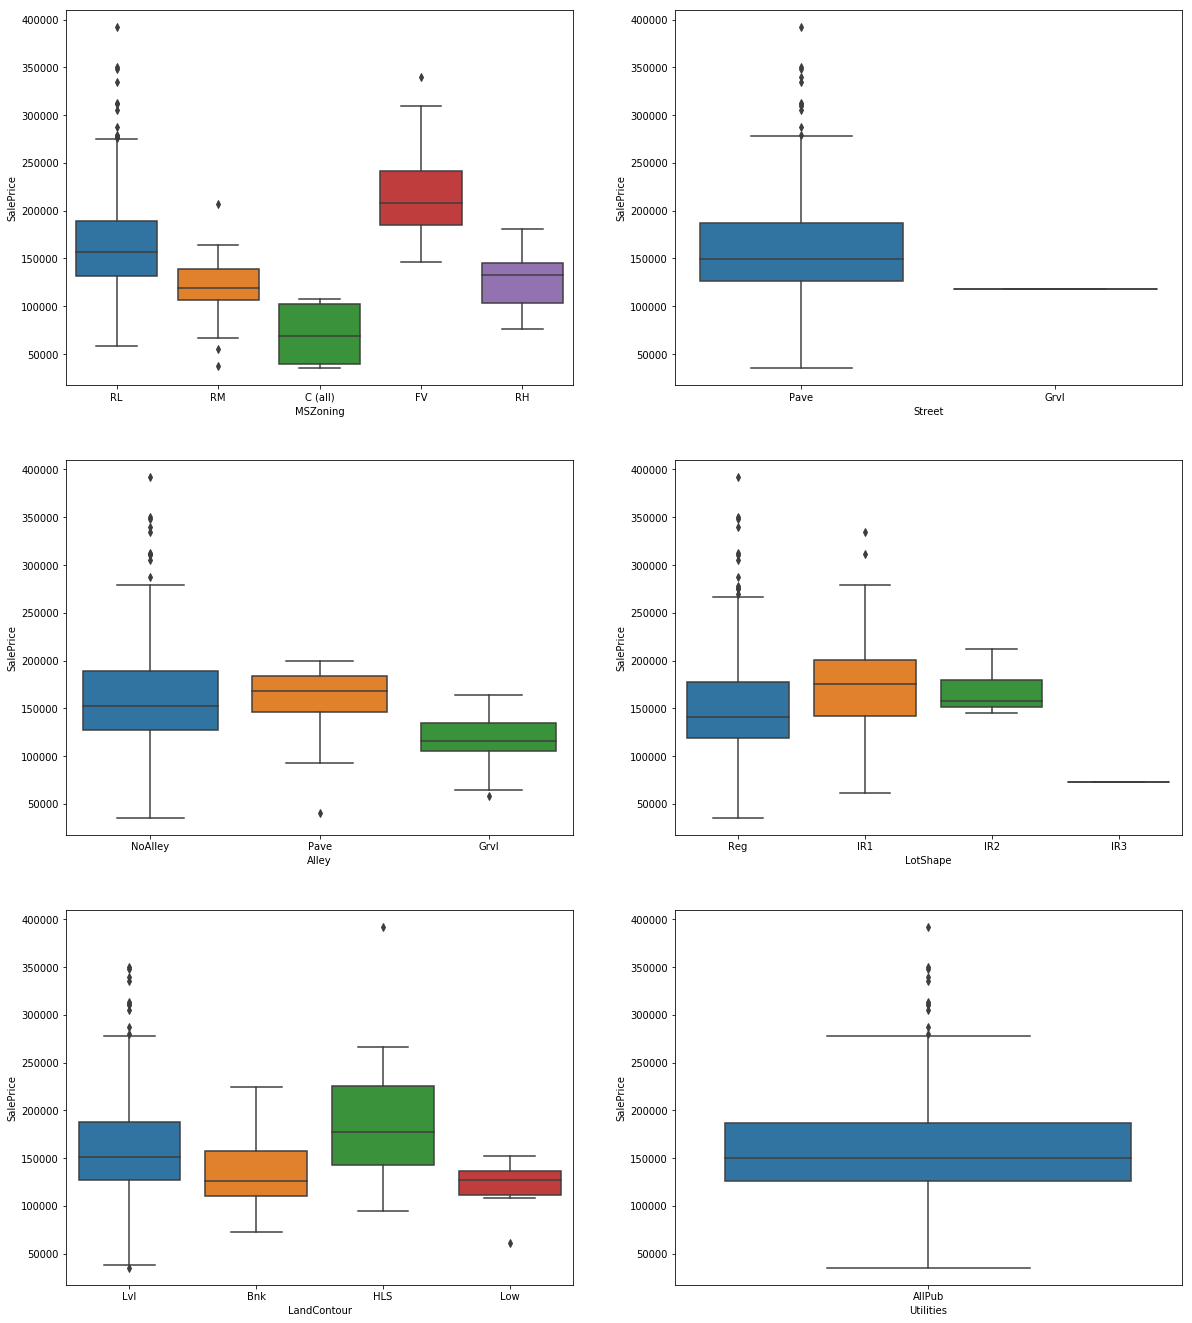

In [1027]:
# Checking boxplots for categorical variables
plt.figure(figsize=(20, 40))
plt.subplot(5,2,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = houses)
plt.subplot(5,2,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = houses)
plt.subplot(5,2,3)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = houses)
plt.subplot(5,2,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = houses)
plt.subplot(5,2,5)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = houses)
plt.subplot(5,2,6)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = houses)
plt.show()

* MSZoning - FV is better
* Street - Pave is better
* Alley - Pave is better
* LotShape - IR1 is better
* LandContour - HLS is better

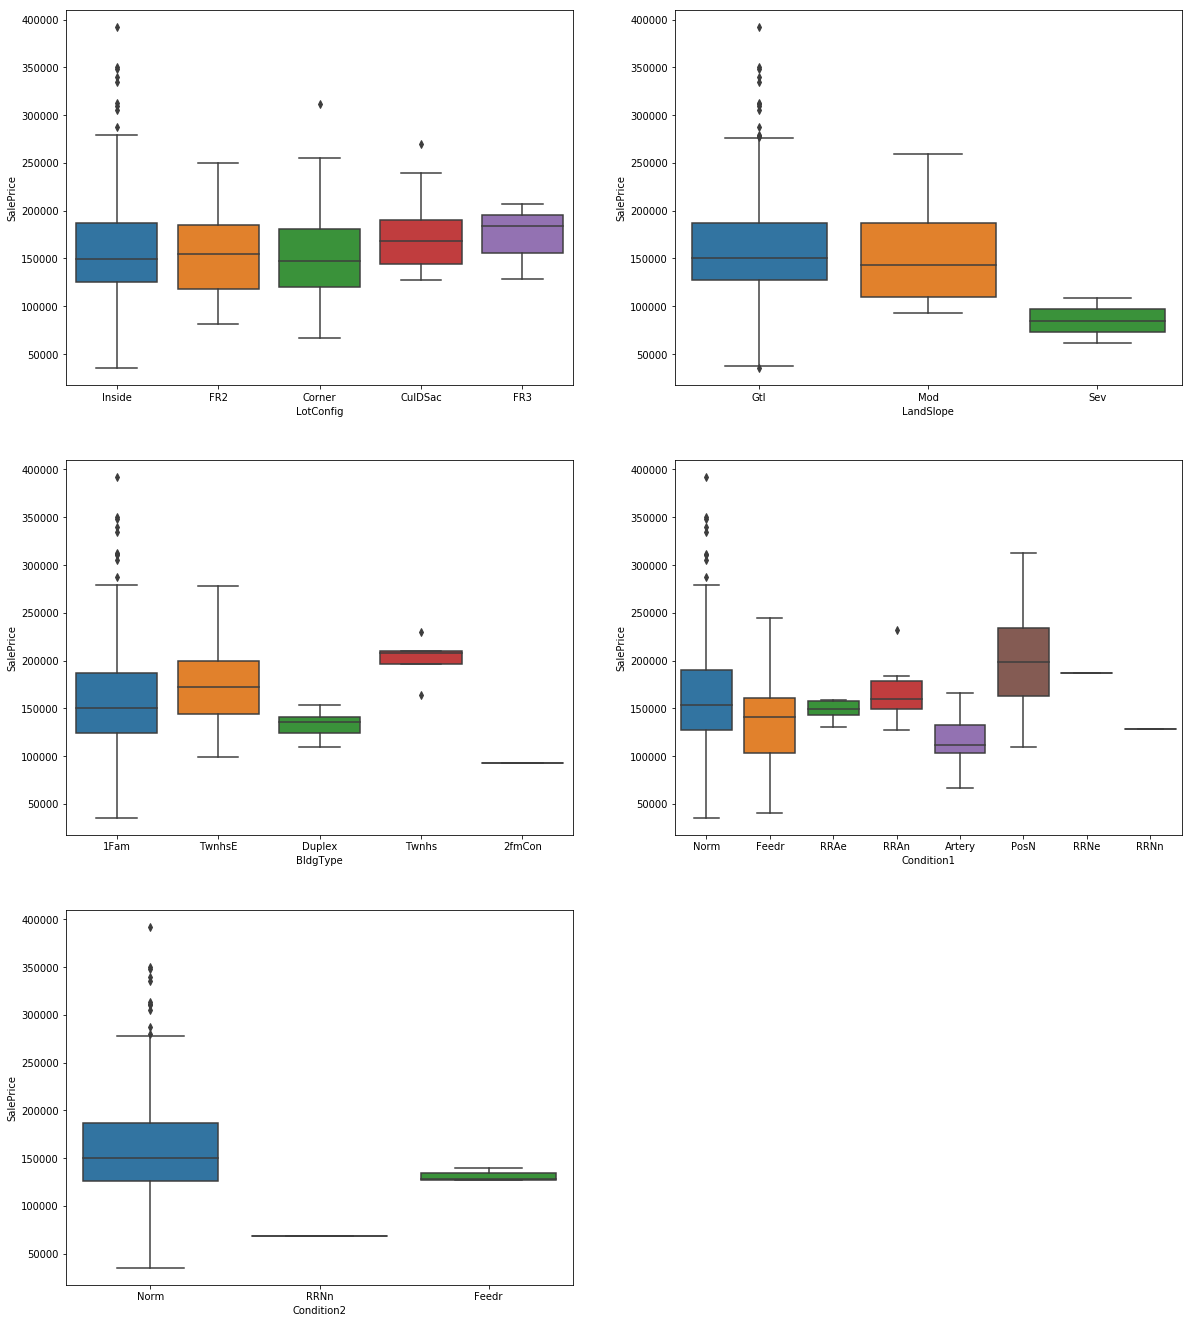

In [1028]:
# Checking boxplots for categorical variables
plt.figure(figsize=(20, 40))
plt.subplot(5,2,1)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = houses)
plt.subplot(5,2,2)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = houses)
plt.subplot(5,2,3)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = houses)
plt.subplot(5,2,4)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = houses)
plt.subplot(5,2,5)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = houses)
plt.show()

* LotConfig - CulDSack is better
* LandScope - Gtl is better
* BldgType - TwnhsE
* Condition1 - PosN

In [1029]:
plt.figure(figsize=(40, 40))
plt.subplot(5,2,1)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houses)

* Neighborhood - No Ridge is preferred

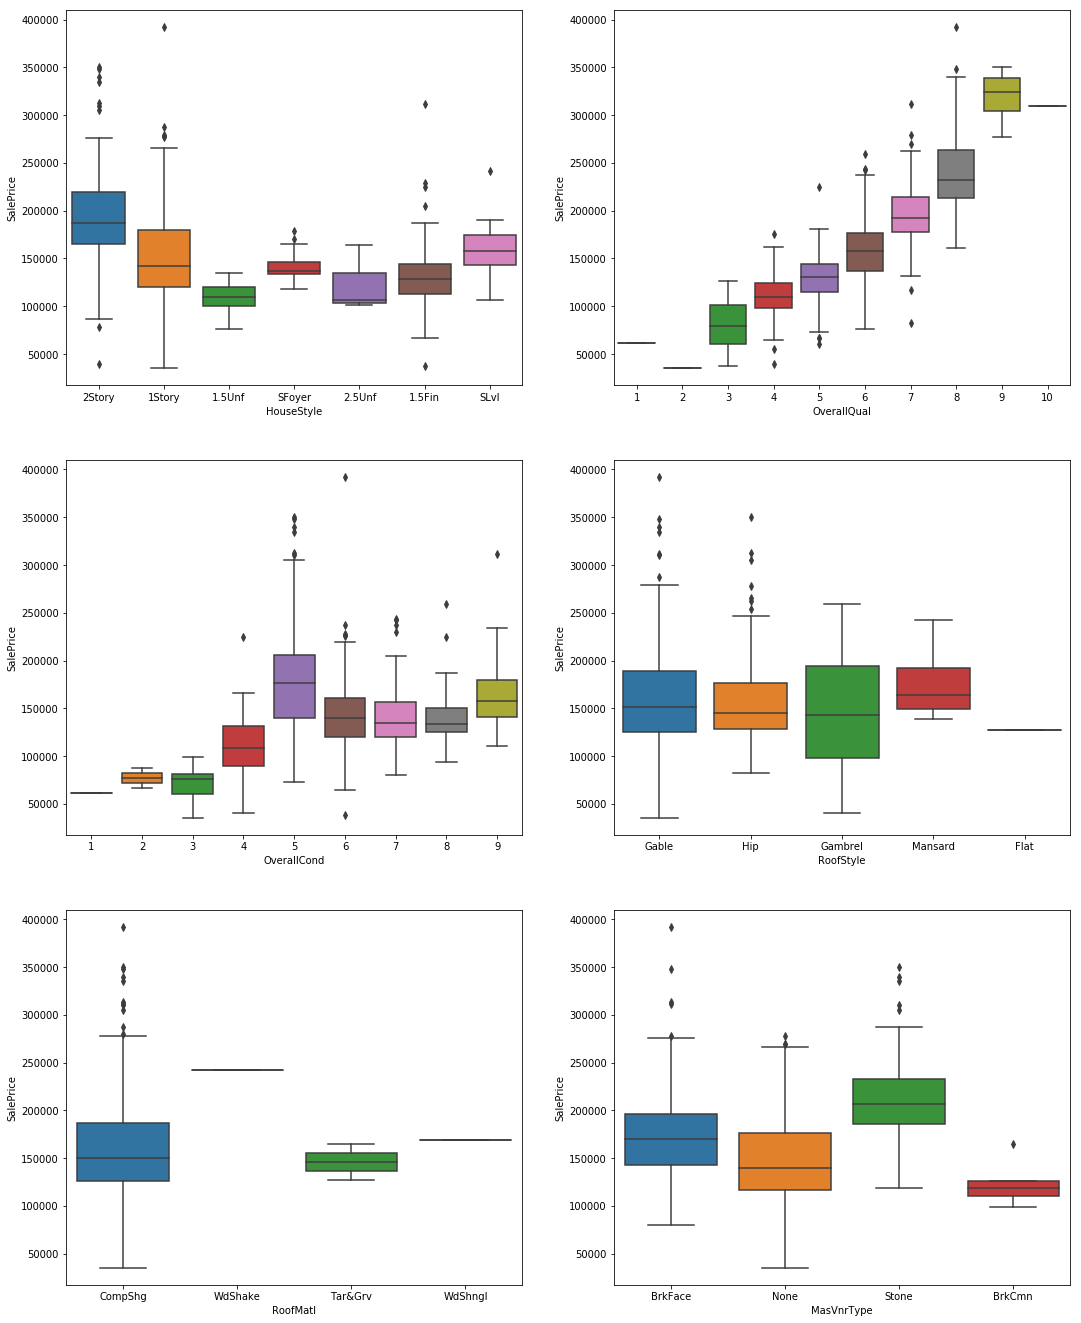

In [1030]:
plt.figure(figsize=(18, 40))
plt.subplot(5,2,1)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = houses)
plt.subplot(5,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = houses)
plt.subplot(5,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = houses)
plt.subplot(5,2,4)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = houses)
plt.subplot(5,2,5)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = houses)
plt.subplot(5,2,6)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = houses)
plt.show()

* HouseStyle - 2Story
* OverallQual - 9
* OverallCond - 5
* RoofStyle - Mansard
* MaxVrnType - Stone

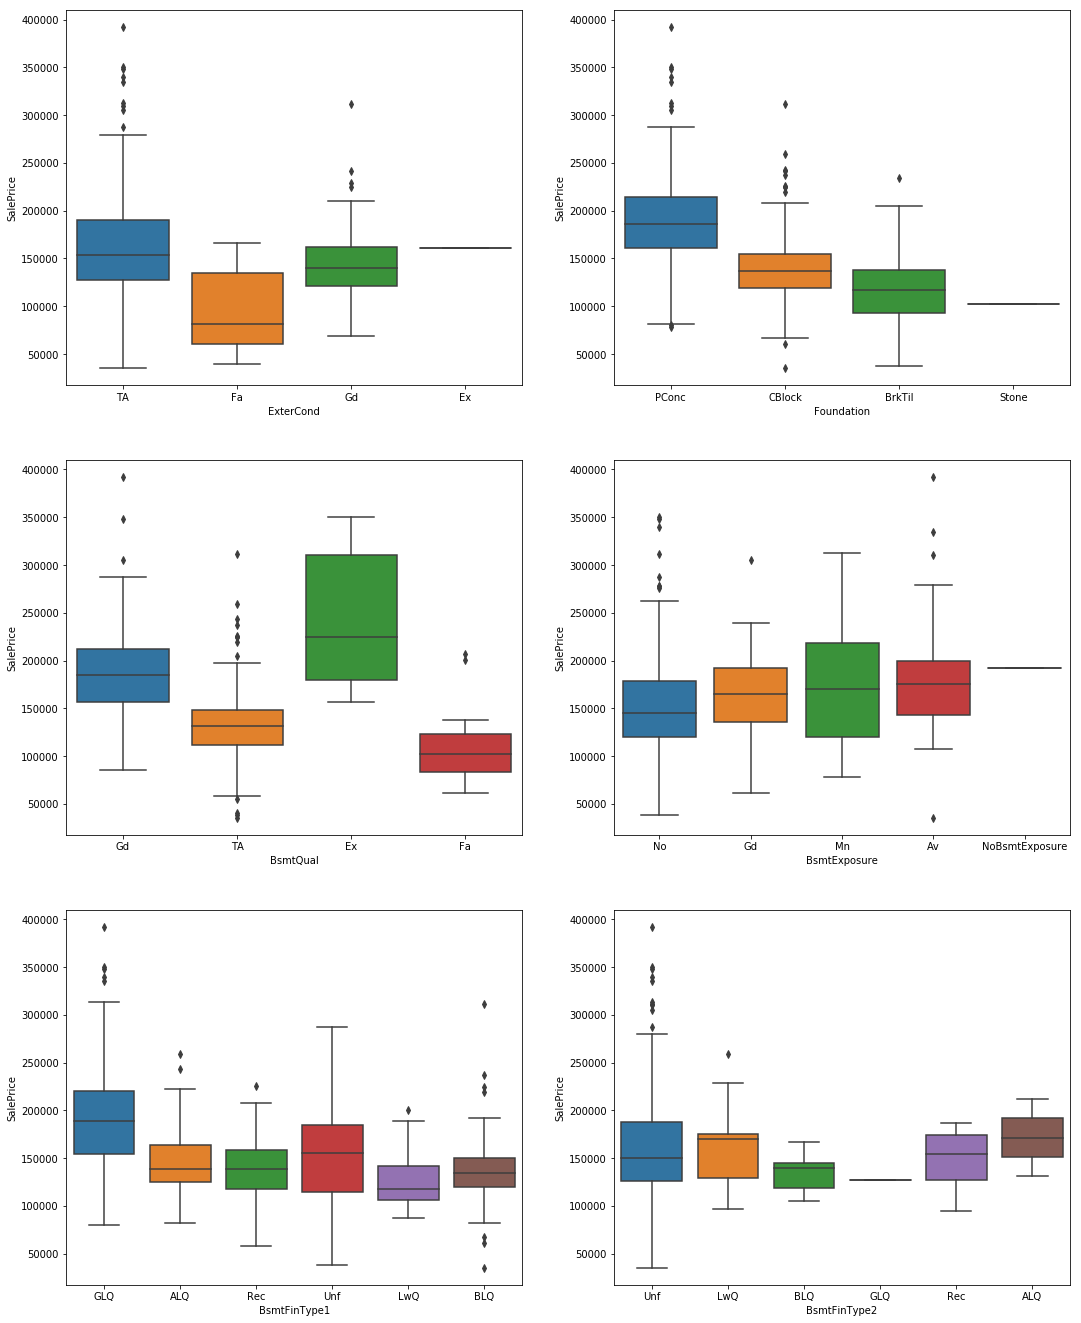

In [1031]:
plt.figure(figsize=(18, 40))
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = houses)
plt.subplot(5,2,1)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = houses)
plt.subplot(5,2,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = houses)
plt.subplot(5,2,3)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = houses)
plt.subplot(5,2,4)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = houses)
plt.subplot(5,2,5)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = houses)
plt.subplot(5,2,6)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = houses)

* ExterCond - TA
* Foundation - PConc
* BsmtQual - Ex
* BsmtExposure - Av
* BsmtFinType1 - GLQ
* BsmtFinType1 - ALQ


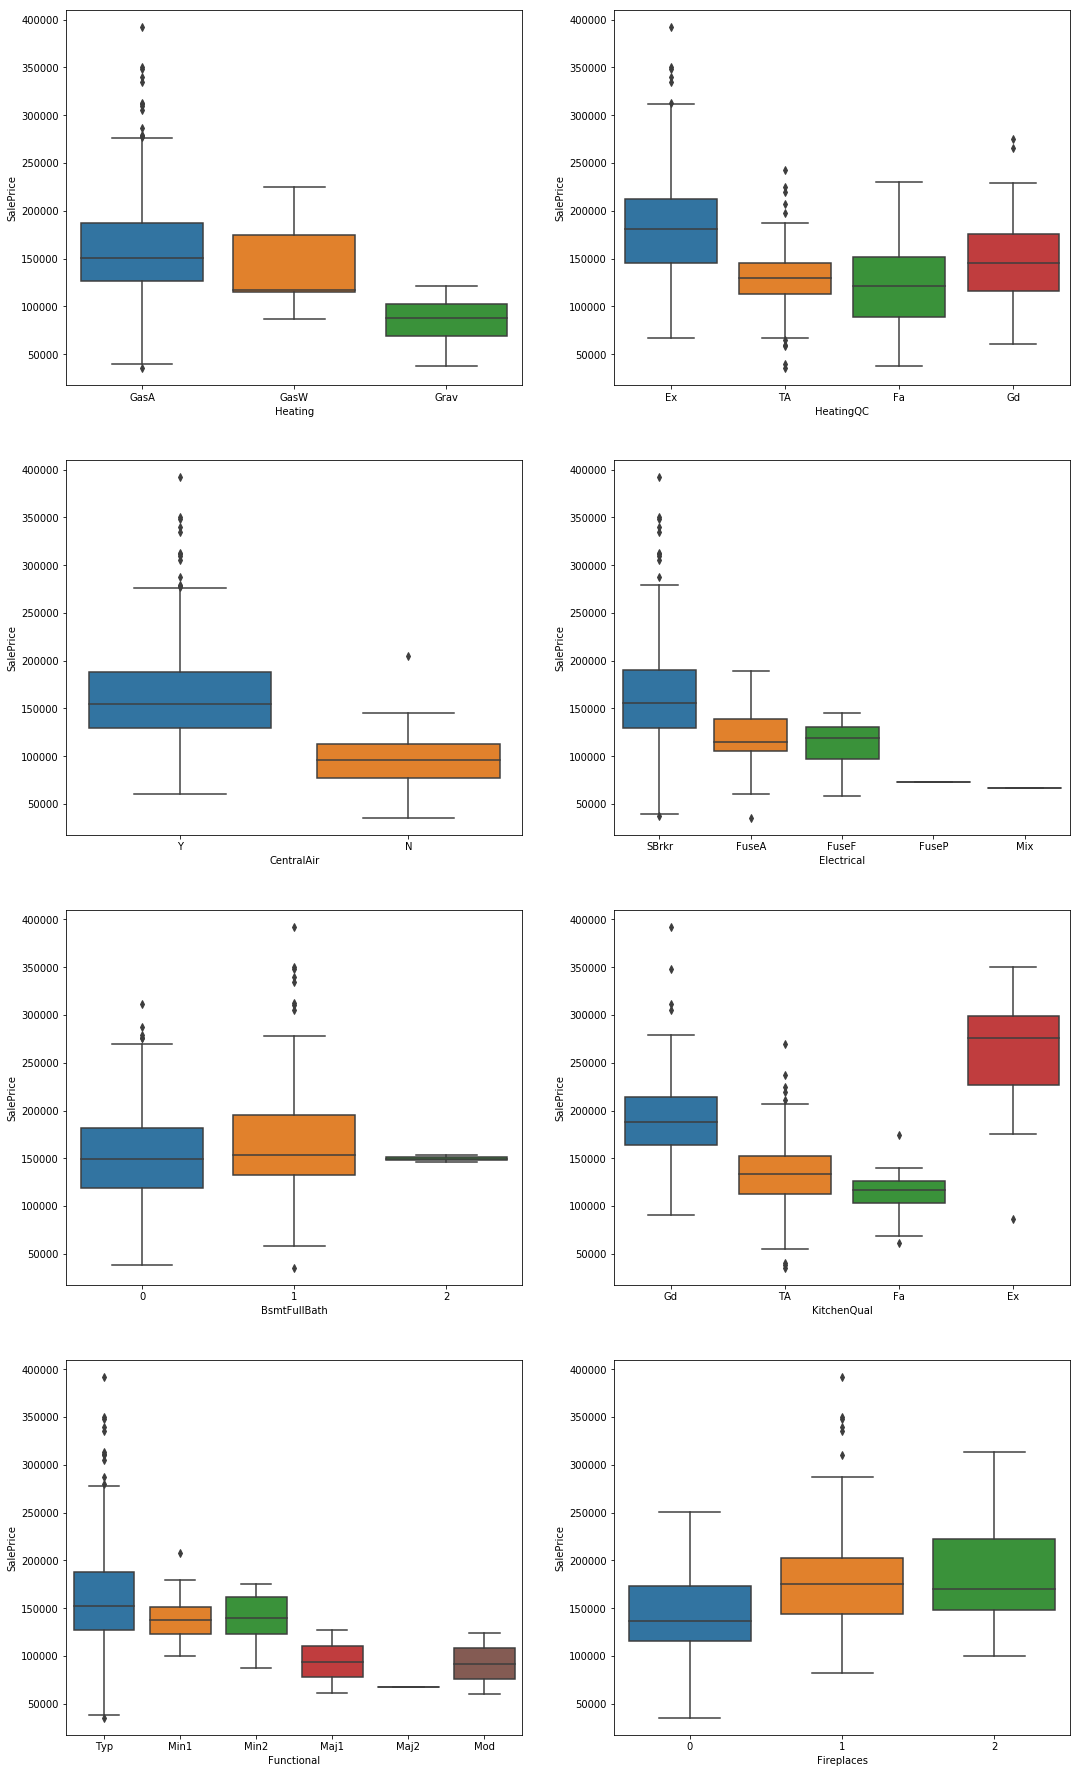

In [1032]:
plt.figure(figsize=(18, 40))
plt.subplot(5,2,1)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = houses)
plt.subplot(5,2,2)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = houses)
plt.subplot(5,2,3)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = houses)
plt.subplot(5,2,4)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = houses)
plt.subplot(5,2,5)
sns.boxplot(x = 'BsmtFullBath', y = 'SalePrice', data = houses)
plt.subplot(5,2,6)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = houses)
plt.subplot(5,2,7)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = houses)
plt.subplot(5,2,8)
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = houses)
plt.show()

* Heating - GasA
* HeatingQC - Ex
* CentralAir - Y
* Electrical - Sbrkr
* BsmtFullBath - 1
* KitchenQual - Ex
* Functional - Typ
* Fireplaces - 1

In [1033]:
plt.figure(figsize=(22, 40))
plt.subplot(5,2,1)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = houses)
plt.subplot(5,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = houses)
plt.subplot(5,2,3)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = houses)
plt.subplot(5,2,4)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = houses)
plt.subplot(5,2,5)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = houses)
plt.subplot(5,2,6)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = houses)
plt.subplot(5,2,7)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = houses)
plt.show()

* Garagetype - Builtin
* GarageFinish - Fin
* PavedDrive - V
* Fence - GdWo
* Saletype - New
* SaleCondition - Partial

### Thus we have completed thr EDA for all the categorical and Numeric Objects

### Step 3 : Perform Normalization for the Sales Price Column

In [1034]:
# Check the data present in the salePrice column
houses.SalePrice.describe()

count       672.000000
mean     158936.839286
std       49215.707967
min       35311.000000
25%      126000.000000
50%      149900.000000
75%      187000.000000
max      392000.000000
Name: SalePrice, dtype: float64

In [1035]:
# Converting the Case to Log Scale
houses.SalePrice = np.log(houses.SalePrice + 1)
houses.SalePrice.describe()

count    672.000000
mean      11.927998
std        0.317361
min       10.471978
25%       11.744045
50%       11.917730
75%       12.138869
max       12.879020
Name: SalePrice, dtype: float64

In [1036]:
# Check the values
houses.SalePrice.head()

0     12.247699
1     12.109016
2     12.317171
4     12.429220
10    11.771444
Name: SalePrice, dtype: float64

#### Thus SalePrice is brought into the computational scale

### Step4 : Create Dummy Variables 

In [1037]:
# Create the Dummy Variables and Drop the Old Variables

dummy = pd.get_dummies(houses['MSSubClass'],prefix='MSSubClass',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['MSSubClass'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['MSZoning'],prefix='MSZoning',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['MSZoning'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Street'],prefix='Street',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Street'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Alley'],prefix='Alley',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Alley'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['LotShape'],prefix='LotShape',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['LotShape'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['LandContour'],prefix='LandContour',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['LandContour'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Utilities'],prefix='Utilities',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Utilities'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['LotConfig'],prefix='LotConfig',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['LotConfig'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['LandSlope'],prefix='LandSlope',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['LandSlope'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Neighborhood'],prefix='Neighborhood',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Neighborhood'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Condition1'],prefix='Condition1',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Condition1'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Condition2'],prefix='Condition2',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Condition2'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['OverallQual'],prefix='OverallQual',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['OverallQual'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['OverallCond'],prefix='OverallCond',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['OverallCond'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['RoofStyle'],prefix='RoofStyle',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['RoofStyle'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['RoofMatl'],prefix='RoofMatl',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['RoofMatl'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Exterior1st'],prefix='Exterior1st',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Exterior1st'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Exterior2nd'],prefix='Exterior2nd',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Exterior2nd'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['MasVnrType'],prefix='MasVnrType',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['MasVnrType'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['ExterQual'],prefix='ExterQual',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['ExterQual'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['ExterCond'],prefix='ExterCond',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['ExterCond'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Foundation'],prefix='Foundation',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Foundation'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BsmtQual'],prefix='BsmtQual',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BsmtQual'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BsmtCond'],prefix='BsmtCond',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BsmtCond'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BsmtExposure'],prefix='BsmtExposure',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BsmtExposure'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BsmtFinType1'],prefix='BsmtFinType1',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BsmtFinType1'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BsmtFinType2'],prefix='BsmtFinType2',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BsmtFinType2'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Heating'],prefix='Heating',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Heating'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['HeatingQC'],prefix='HeatingQC',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['HeatingQC'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['CentralAir'],prefix='CentralAir',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['CentralAir'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Electrical'],prefix='Electrical',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Electrical'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BsmtFullBath'],prefix='BsmtFullBath',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BsmtFullBath'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BsmtHalfBath'],prefix='BsmtHalfBath',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BsmtHalfBath'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['FullBath'],prefix='FullBath',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['FullBath'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['HalfBath'],prefix='HalfBath',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['HalfBath'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BedroomAbvGr'],prefix='BedroomAbvGr',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BedroomAbvGr'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['KitchenAbvGr'],prefix='KitchenAbvGr',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['KitchenAbvGr'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['KitchenQual'],prefix='KitchenQual',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['KitchenQual'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['TotRmsAbvGrd'],prefix='TotRmsAbvGrd',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['TotRmsAbvGrd'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Functional'],prefix='Functional',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Functional'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Fireplaces'],prefix='Fireplaces',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Fireplaces'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['FireplaceQu'],prefix='FireplaceQu',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['FireplaceQu'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['GarageType'],prefix='GarageType',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['GarageType'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['GarageFinish'],prefix='GarageFinish',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['GarageFinish'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['GarageCars'],prefix='GarageCars',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['GarageCars'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['GarageQual'],prefix='GarageQual',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['GarageQual'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['GarageCond'],prefix='GarageCond',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['GarageCond'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['PavedDrive'],prefix='PavedDrive',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['PavedDrive'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['PoolQC'],prefix='PoolQC',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['PoolQC'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['Fence'],prefix='Fence',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['Fence'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['MiscFeature'],prefix='MiscFeature',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['MiscFeature'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['MoSold'],prefix='MoSold',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['MoSold'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['SaleType'],prefix='SaleType',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['SaleType'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['SaleCondition'],prefix='SaleCondition',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['SaleCondition'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['HouseStyle'],prefix='HouseStyle',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['HouseStyle'],axis = 1,inplace = True)

dummy = pd.get_dummies(houses['BldgType'],prefix='BldgType',drop_first = True)
dummy = dummy.astype(float)
houses = pd.concat([houses,dummy],axis = 1)
houses.drop(['BldgType'],axis = 1,inplace = True)

In [1038]:
houses.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0    1         65.0     8450       196.0         706           0        150   
1    2         80.0     9600         0.0         978           0        284   
2    3         68.0    11250       162.0         486           0        434   
4    5         84.0    14260       350.0         655           0        490   
10  11         70.0    11200         0.0         906           0        134   

    TotalBsmtSF  1stFlrSF  2ndFlrSF       ...         HouseStyle_1.5Unf  \
0           856       856       854       ...                       0.0   
1          1262      1262         0       ...                       0.0   
2           920       920       866       ...                       0.0   
4          1145      1145      1053       ...                       0.0   
10         1040      1040         0       ...                       0.0   

    HouseStyle_1Story  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                 0.0                0.0                1.0   
1                 1.0                0.0                0.0   
2                 0.0                0.0                1.0   
4                 0.0                0.0                1.0   
10                1.0                0.0                0.0   

    HouseStyle_SFoyer  HouseStyle_SLvl  BldgType_2fmCon  BldgType_Duplex  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
10                0.0              0.0              0.0              0.0   

    BldgType_Twnhs  BldgType_TwnhsE  
0              0.0              0.0  
1              0.0              0.0  
2              0.0              0.0  
4              0.0              0.0  
10             0.0              0.0  

[5 rows x 280 columns]

#### Thus we have created dummies for all the categorical columns

### Step5 : Creating the Train and Test Data

In [1039]:
from sklearn.model_selection import train_test_split

# Feature variable as X
X = houses.drop(['SalePrice'], axis=1)

X.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0    1         65.0     8450       196.0         706           0        150   
1    2         80.0     9600         0.0         978           0        284   
2    3         68.0    11250       162.0         486           0        434   
4    5         84.0    14260       350.0         655           0        490   
10  11         70.0    11200         0.0         906           0        134   

    TotalBsmtSF  1stFlrSF  2ndFlrSF       ...         HouseStyle_1.5Unf  \
0           856       856       854       ...                       0.0   
1          1262      1262         0       ...                       0.0   
2           920       920       866       ...                       0.0   
4          1145      1145      1053       ...                       0.0   
10         1040      1040         0       ...                       0.0   

    HouseStyle_1Story  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                 0.0                0.0                1.0   
1                 1.0                0.0                0.0   
2                 0.0                0.0                1.0   
4                 0.0                0.0                1.0   
10                1.0                0.0                0.0   

    HouseStyle_SFoyer  HouseStyle_SLvl  BldgType_2fmCon  BldgType_Duplex  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
10                0.0              0.0              0.0              0.0   

    BldgType_Twnhs  BldgType_TwnhsE  
0              0.0              0.0  
1              0.0              0.0  
2              0.0              0.0  
4              0.0              0.0  
10             0.0              0.0  

[5 rows x 279 columns]

In [1040]:
#  Target variable
y = houses['SalePrice']

In [1041]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6 - Using RFE for Feature Selection

In [1042]:
# Using RFE method

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [1043]:
# Selecting around 75 features

lm = LinearRegression()
rfe = RFE(lm, 80)
rfe = rfe.fit(X_train, y_train)

In [1044]:
# Check Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 189),
 ('LotFrontage', False, 184),
 ('LotArea', False, 186),
 ('MasVnrArea', False, 188),
 ('BsmtFinSF1', False, 179),
 ('BsmtFinSF2', False, 183),
 ('BsmtUnfSF', False, 187),
 ('TotalBsmtSF', False, 182),
 ('1stFlrSF', False, 190),
 ('2ndFlrSF', False, 181),
 ('LowQualFinSF', False, 191),
 ('GrLivArea', False, 174),
 ('GarageArea', False, 177),
 ('WoodDeckSF', False, 185),
 ('OpenPorchSF', False, 175),
 ('EnclosedPorch', False, 173),
 ('3SsnPorch', False, 192),
 ('ScreenPorch', False, 170),
 ('PoolArea', False, 193),
 ('MiscVal', False, 194),
 ('HouseAge', False, 166),
 ('RemodAddAge', False, 180),
 ('BuiltAge', False, 168),
 ('GarageBltAge', False, 176),
 ('MSSubClass_30', False, 13),
 ('MSSubClass_40', False, 104),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 42),
 ('MSSubClass_60', False, 69),
 ('MSSubClass_70', False, 68),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 33),
 ('MSSubClass_85', False, 113),
 ('MSSubClass_90', True, 1),
 ('MSSubClass

In [1045]:
# Creating RFE features

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

MSSubClass_45  MSSubClass_75  MSSubClass_90  MSSubClass_120  \
1400            0.0            0.0            0.0             0.0   
1422            0.0            0.0            0.0             1.0   
865             0.0            0.0            0.0             0.0   
1285            0.0            0.0            0.0             0.0   
933             0.0            0.0            0.0             0.0   

      MSSubClass_160  MSZoning_FV  MSZoning_RH  MSZoning_RL  LotShape_IR3  \
1400             0.0          0.0          0.0          0.0           0.0   
1422             0.0          0.0          0.0          0.0           0.0   
865              0.0          0.0          0.0          1.0           0.0   
1285             0.0          0.0          0.0          0.0           0.0   
933              0.0          0.0          0.0          1.0           0.0   

      OverallQual_3       ...         GarageCond_Gd  GarageCond_NoGarageCond  \
1400            0.0       ...                   0.0                      0.0   
1422            0.0       ...                   0.0                      0.0   
865             0.0       ...                   0.0                      0.0   
1285            0.0       ...                   0.0                      0.0   
933             0.0       ...                   0.0                      0.0   

      GarageCond_Po  GarageCond_TA  SaleCondition_Alloca  HouseStyle_1.5Unf  \
1400            0.0            1.0                   0.0                0.0   
1422            0.0            1.0                   0.0                0.0   
865             0.0            1.0                   0.0                0.0   
1285            0.0            1.0                   0.0                0.0   
933             0.0            1.0                   0.0                0.0   

      HouseStyle_2.5Unf  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  
1400                0.0              0.0             0.0              0.0  
1422                0.0              0.0             0.0              1.0  
865                 0.0              0.0             0.0              0.0  
1285                0.0              0.0             0.0              0.0  
933                 0.0              0.0             0.0              0.0  

[5 rows x 80 columns]

### Step 7 - Model Building 

### Ridge Regression

In [1046]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [1047]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1048]:
# Put the values in a New variable

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.003810         0.000503        -0.121609         -0.098793   
1       0.006617         0.000903        -0.121602         -0.098798   
2       0.008622         0.000502        -0.121535         -0.098850   
3       0.003609         0.000502        -0.121257         -0.099074   
4       0.004010         0.000903        -0.121035         -0.099330   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               20          -0.120215   
1       0.001   {'alpha': 0.001}               19          -0.120207   
2        0.01    {'alpha': 0.01}               18          -0.120124   
3        0.05    {'alpha': 0.05}               16          -0.119742   
4         0.1     {'alpha': 0.1}               14          -0.119639   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.099877          -0.114641       ...                 -0.130646   
1           -0.099883          -0.114636       ...                 -0.130649   
2           -0.099940          -0.114588       ...                 -0.130677   
3           -0.100165          -0.114392       ...                 -0.130817   
4           -0.100400          -0.114174       ...                 -0.131002   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.097299          -0.110691           -0.102450   
1           -0.097304          -0.110682           -0.102455   
2           -0.097347          -0.110589           -0.102503   
3           -0.097521          -0.110194           -0.102698   
4           -0.097709          -0.109738           -0.102957   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.131853           -0.096226      0.001292    4.033152e-06   
1          -0.131838           -0.096231      0.003901    5.847545e-04   
2          -0.131696           -0.096287      0.004040    5.761645e-07   
3          -0.131140           -0.096545      0.001204    6.810597e-07   
4          -0.130622           -0.096854      0.001554    5.845581e-04   

   std_test_score  std_train_score  
0        0.008442         0.002183  
1        0.008442         0.002183  
2        0.008449         0.002182  
3        0.008495         0.002169  
4        0.008578         0.002164  

[5 rows x 21 columns]

In [1049]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1050]:
# Alpha Value Tuning

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1051]:
# Choose values less then 50

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=50]
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.003710         0.000502        -0.121609         -0.098793   
1       0.002707         0.000501        -0.121602         -0.098798   
2       0.010126         0.000502        -0.121535         -0.098850   
3       0.012333         0.002207        -0.121257         -0.099074   
4       0.004712         0.001003        -0.121035         -0.099330   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               20          -0.120215   
1       0.001   {'alpha': 0.001}               19          -0.120207   
2        0.01    {'alpha': 0.01}               18          -0.120124   
3        0.05    {'alpha': 0.05}               16          -0.119742   
4         0.1     {'alpha': 0.1}               14          -0.119639   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.099877          -0.114641       ...                 -0.130646   
1           -0.099883          -0.114636       ...                 -0.130649   
2           -0.099940          -0.114588       ...                 -0.130677   
3           -0.100165          -0.114392       ...                 -0.130817   
4           -0.100400          -0.114174       ...                 -0.131002   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.097299          -0.110691           -0.102450   
1           -0.097304          -0.110682           -0.102455   
2           -0.097347          -0.110589           -0.102503   
3           -0.097521          -0.110194           -0.102698   
4           -0.097709          -0.109738           -0.102957   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.131853           -0.096226      0.001126    7.448435e-07   
1          -0.131838           -0.096231      0.000680    4.768372e-07   
2          -0.131696           -0.096287      0.003255    7.387129e-07   
3          -0.131140           -0.096545      0.010529    2.276950e-03   
4          -0.130622           -0.096854      0.001080    7.761104e-04   

   std_test_score  std_train_score  
0        0.008442         0.002183  
1        0.008442         0.002183  
2        0.008449         0.002182  
3        0.008495         0.002169  
4        0.008578         0.002164  

[5 rows x 21 columns]

In [1052]:
# Plot Test Train sets

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


#### At alpha = 20 we can see a slope moving downwards

In [1053]:
# Choose the value of alpha = 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-0.01658   , -0.00943587, -0.00926257,  0.02681398, -0.01440037,
        0.11352331, -0.00670624,  0.09219634, -0.02352401, -0.03784769,
       -0.12897055, -0.06237809, -0.02684603,  0.06756311,  0.12257808,
        0.04712371,  0.01877746, -0.02257818, -0.07160629, -0.06033479,
        0.03501927, -0.00880233,  0.04848687,  0.03471216,  0.04510329,
        0.01495272, -0.01867805,  0.00054976,  0.00200532,  0.00706062,
       -0.02887413,  0.02058005, -0.02887413,  0.02058005, -0.0054289 ,
       -0.01120698, -0.02352401, -0.01120698,  0.00021339,  0.00038941,
       -0.09060575,  0.05995992,  0.02610585, -0.0244059 , -0.0546729 ,
        0.02459731,  0.03250443,  0.01686963,  0.02552562, -0.02427153,
       -0.00242435,  0.00463627, -0.01120698, -0.02887413,  0.02035388,
        0.04255753, -0.06291141, -0.00423423, -0.0272718 , -0.0272718 ,
       -0.08117064,  0.03320533,  0.07845032, -0.00321322, -0.02769022,
       -0.00351481, -0.0272718 , -0.01120698,  0.06968381, -0.04

In [1054]:
# Final Set of Co-Efficients
ridge.coef_

array([-0.01658   , -0.00943587, -0.00926257,  0.02681398, -0.01440037,
        0.11352331, -0.00670624,  0.09219634, -0.02352401, -0.03784769,
       -0.12897055, -0.06237809, -0.02684603,  0.06756311,  0.12257808,
        0.04712371,  0.01877746, -0.02257818, -0.07160629, -0.06033479,
        0.03501927, -0.00880233,  0.04848687,  0.03471216,  0.04510329,
        0.01495272, -0.01867805,  0.00054976,  0.00200532,  0.00706062,
       -0.02887413,  0.02058005, -0.02887413,  0.02058005, -0.0054289 ,
       -0.01120698, -0.02352401, -0.01120698,  0.00021339,  0.00038941,
       -0.09060575,  0.05995992,  0.02610585, -0.0244059 , -0.0546729 ,
        0.02459731,  0.03250443,  0.01686963,  0.02552562, -0.02427153,
       -0.00242435,  0.00463627, -0.01120698, -0.02887413,  0.02035388,
        0.04255753, -0.06291141, -0.00423423, -0.0272718 , -0.0272718 ,
       -0.08117064,  0.03320533,  0.07845032, -0.00321322, -0.02769022,
       -0.00351481, -0.0272718 , -0.01120698,  0.06968381, -0.04

### Lasso Regression 

In [1055]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 30, 50, 100, 200, 300, 500 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 30, 50, 100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1056]:
# Identify the results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.012833         0.002106        -0.120995         -0.100187   
1       0.006617         0.000602        -0.122699         -0.106855   
2       0.002507         0.000501        -0.138306         -0.129795   
3       0.002105         0.000602        -0.194279         -0.192855   
4       0.002106         0.000401        -0.247718         -0.247023   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}                1          -0.117491   
1       0.001   {'alpha': 0.001}                2          -0.120233   
2        0.01    {'alpha': 0.01}                3          -0.126140   
3        0.05    {'alpha': 0.05}                4          -0.168706   
4         0.1     {'alpha': 0.1}                5          -0.225324   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.101131          -0.113809       ...                 -0.131908   
1           -0.107368          -0.116137       ...                 -0.143789   
2           -0.130414          -0.125526       ...                 -0.165131   
3           -0.199505          -0.182475       ...                 -0.217352   
4           -0.252754          -0.236257       ...                 -0.267681   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.098717          -0.111393           -0.103786   
1           -0.104113          -0.108828           -0.110049   
2           -0.122343          -0.148355           -0.131939   
3           -0.185391          -0.219688           -0.193551   
4           -0.242145          -0.277553           -0.240013   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.130376           -0.097950      0.004709        0.002964   
1          -0.124511           -0.105987      0.002112        0.000375   
2          -0.126377           -0.131123      0.000549        0.000317   
3          -0.183174           -0.192043      0.000200        0.000492   
4          -0.231775           -0.250865      0.000200        0.000375   

   std_test_score  std_train_score  
0        0.008523         0.002084  
1        0.011744         0.001936  
2        0.015964         0.003836  
3        0.020467         0.004516  
4        0.020860         0.005018  

[5 rows x 21 columns]

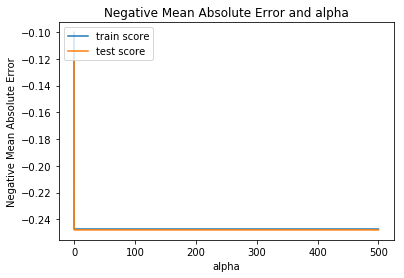

In [1057]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1058]:
# Pick a genuine alpha value

lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 30, 50, 100]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1059]:
# Put the results in a Dataframe

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.011230         0.000802        -0.120995         -0.100187   
1       0.007319         0.000803        -0.122699         -0.106855   
2       0.003008         0.000501        -0.138306         -0.129795   
3       0.002006         0.000501        -0.194279         -0.192855   
4       0.002006         0.000501        -0.247718         -0.247023   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}                1          -0.117491   
1       0.001   {'alpha': 0.001}                2          -0.120233   
2        0.01    {'alpha': 0.01}                3          -0.126140   
3        0.05    {'alpha': 0.05}                4          -0.168706   
4         0.1     {'alpha': 0.1}                5          -0.225324   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.101131          -0.113809       ...                 -0.131908   
1           -0.107368          -0.116137       ...                 -0.143789   
2           -0.130414          -0.125526       ...                 -0.165131   
3           -0.199505          -0.182475       ...                 -0.217352   
4           -0.252754          -0.236257       ...                 -0.267681   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.098717          -0.111393           -0.103786   
1           -0.104113          -0.108828           -0.110049   
2           -0.122343          -0.148355           -0.131939   
3           -0.185391          -0.219688           -0.193551   
4           -0.242145          -0.277553           -0.240013   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.130376           -0.097950      0.002046    4.011875e-04   
1          -0.124511           -0.105987      0.000600    2.458073e-04   
2          -0.126377           -0.131123      0.001268    3.171098e-04   
3          -0.183174           -0.192043      0.000549    4.909339e-07   
4          -0.231775           -0.250865      0.000317    5.223489e-07   

   std_test_score  std_train_score  
0        0.008523         0.002084  
1        0.011744         0.001936  
2        0.015964         0.003836  
3        0.020467         0.004516  
4        0.020860         0.005018  

[5 rows x 21 columns]

In [1060]:
# Plot the Test and Train Data

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1061]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1062]:
# Check results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.012232         0.001505        -0.120995         -0.100187   
1       0.006718         0.000903        -0.122699         -0.106855   
2       0.002607         0.000401        -0.138306         -0.129795   
3       0.002206         0.000501        -0.194279         -0.192855   
4       0.002006         0.000501        -0.247718         -0.247023   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}                1          -0.117491   
1       0.001   {'alpha': 0.001}                2          -0.120233   
2        0.01    {'alpha': 0.01}                3          -0.126140   
3        0.05    {'alpha': 0.05}                4          -0.168706   
4         0.1     {'alpha': 0.1}                5          -0.225324   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.101131          -0.113809       ...                 -0.131908   
1           -0.107368          -0.116137       ...                 -0.143789   
2           -0.130414          -0.125526       ...                 -0.165131   
3           -0.199505          -0.182475       ...                 -0.217352   
4           -0.252754          -0.236257       ...                 -0.267681   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.098717          -0.111393           -0.103786   
1           -0.104113          -0.108828           -0.110049   
2           -0.122343          -0.148355           -0.131939   
3           -0.185391          -0.219688           -0.193551   
4           -0.242145          -0.277553           -0.240013   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.130376           -0.097950      0.001696    4.475030e-04   
1          -0.124511           -0.105987      0.001753    5.850321e-04   
2          -0.126377           -0.131123      0.000737    2.005595e-04   
3          -0.183174           -0.192043      0.000246    5.917394e-07   
4          -0.231775           -0.250865      0.000317    4.768372e-07   

   std_test_score  std_train_score  
0        0.008523         0.002084  
1        0.011744         0.001936  
2        0.015964         0.003836  
3        0.020467         0.004516  
4        0.020860         0.005018  

[5 rows x 21 columns]

In [1063]:
# Plot Train and Test

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1064]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1065]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.011329         0.001205        -0.120995         -0.100187   
1       0.006718         0.000803        -0.122699         -0.106855   
2       0.002306         0.000201        -0.138306         -0.129795   
3       0.002005         0.000702        -0.194279         -0.192855   
4       0.002307         0.000401        -0.247718         -0.247023   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}                1          -0.117491   
1       0.001   {'alpha': 0.001}                2          -0.120233   
2        0.01    {'alpha': 0.01}                3          -0.126140   
3        0.05    {'alpha': 0.05}                4          -0.168706   
4         0.1     {'alpha': 0.1}                5          -0.225324   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.101131          -0.113809       ...                 -0.131908   
1           -0.107368          -0.116137       ...                 -0.143789   
2           -0.130414          -0.125526       ...                 -0.165131   
3           -0.199505          -0.182475       ...                 -0.217352   
4           -0.252754          -0.236257       ...                 -0.267681   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.098717          -0.111393           -0.103786   
1           -0.104113          -0.108828           -0.110049   
2           -0.122343          -0.148355           -0.131939   
3           -0.185391          -0.219688           -0.193551   
4           -0.242145          -0.277553           -0.240013   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.130376           -0.097950      0.002645        0.001172   
1          -0.124511           -0.105987      0.000873        0.000246   
2          -0.126377           -0.131123      0.000245        0.000246   
3          -0.183174           -0.192043      0.000549        0.000401   
4          -0.231775           -0.250865      0.000602        0.000200   

   std_test_score  std_train_score  
0        0.008523         0.002084  
1        0.011744         0.001936  
2        0.015964         0.003836  
3        0.020467         0.004516  
4        0.020860         0.005018  

[5 rows x 21 columns]

In [1066]:
# Plot the Test Train Data

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1067]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1068]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.010829         0.000502        -0.120995         -0.100187   
1       0.007018         0.000201        -0.122699         -0.106855   
2       0.002708         0.002106        -0.138306         -0.129795   
3       0.002006         0.000602        -0.194279         -0.192855   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}                1          -0.117491   
1       0.001   {'alpha': 0.001}                2          -0.120233   
2        0.01    {'alpha': 0.01}                3          -0.126140   
3        0.05    {'alpha': 0.05}                4          -0.168706   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.101131          -0.113809       ...                 -0.131908   
1           -0.107368          -0.116137       ...                 -0.143789   
2           -0.130414          -0.125526       ...                 -0.165131   
3           -0.199505          -0.182475       ...                 -0.217352   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.098717          -0.111393           -0.103786   
1           -0.104113          -0.108828           -0.110049   
2           -0.122343          -0.148355           -0.131939   
3           -0.185391          -0.219688           -0.193551   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.130376           -0.097950      0.002321        0.000449   
1          -0.124511           -0.105987      0.001098        0.000401   
2          -0.126377           -0.131123      0.000751        0.002090   
3          -0.183174           -0.192043      0.000549        0.000201   

   std_test_score  std_train_score  
0        0.008523         0.002084  
1        0.011744         0.001936  
2        0.015964         0.003836  
3        0.020467         0.004516  

[4 rows x 21 columns]

In [1069]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1070]:
# Choosing alpha = 0.01

alpha =0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1071]:
#Check the co-efficients
lasso.coef_

array([-0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.04436614, -0.        , -0.        ,
       -0.09557346, -0.01793492, -0.        ,  0.07383961,  0.11385262,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.01800269, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.19348027,  0.        ,  0.        , -0.        , -0.04118755,
        0.00296633,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.07681702, -0.        , -0.        , -0.        ,
       -0.09698427,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.10807867, -0.  

In [1072]:
coefficients = pd.DataFrame(X_train_rfe.columns)
coefficients['Coefficient Estimate'] = pd.Series(lasso.coef_)
coefficients

0  Coefficient Estimate
0               MSSubClass_45             -0.000000
1               MSSubClass_75             -0.000000
2               MSSubClass_90             -0.000000
3              MSSubClass_120              0.000000
4              MSSubClass_160             -0.000000
5                 MSZoning_FV              0.000000
6                 MSZoning_RH             -0.000000
7                 MSZoning_RL              0.044366
8                LotShape_IR3             -0.000000
9               OverallQual_3             -0.000000
10              OverallQual_4             -0.095573
11              OverallQual_5             -0.017935
12              OverallQual_6             -0.000000
13              OverallQual_7              0.073840
14              OverallQual_8              0.113853
15              OverallQual_9              0.000000
16             OverallQual_10              0.000000
17              OverallCond_2             -0.000000
18              OverallCond_3             -0.000000
19              OverallCond_4             -0.000000
20              OverallCond_5              0.018003
21              OverallCond_6             -0.000000
22              OverallCond_7              0.000000
23              OverallCond_8              0.000000
24              OverallCond_9              0.000000
25            RoofStyle_Gable              0.000000
26          RoofStyle_Gambrel             -0.000000
27              RoofStyle_Hip              0.000000
28          RoofStyle_Mansard              0.000000
29           RoofMatl_WdShake              0.000000
..                        ...                   ...
50             KitchenAbvGr_3             -0.000000
51            TotRmsAbvGrd_11              0.000000
52            Functional_Maj2             -0.000000
53             Functional_Mod             -0.000000
54               Fireplaces_1              0.000000
55               Fireplaces_2              0.000000
56  FireplaceQu_NoFirePlaceQu             -0.076817
57         GarageType_CarPort             -0.000000
58    GarageType_NoGarageType             -0.000000
59   GarageFinish_NoGarageFin             -0.000000
60               GarageCars_1             -0.096984
61               GarageCars_2              0.000000
62               GarageCars_3              0.000000
63               GarageCars_4             -0.000000
64              GarageQual_Fa             -0.000000
65              GarageQual_Gd             -0.000000
66    GarageQual_NoGarageQual             -0.000000
67              GarageQual_Po             -0.000000
68              GarageQual_TA              0.108079
69              GarageCond_Fa             -0.000000
70              GarageCond_Gd              0.000000
71    GarageCond_NoGarageCond             -0.000000
72              GarageCond_Po             -0.000000
73              GarageCond_TA              0.102403
74       SaleCondition_Alloca             -0.000000
75          HouseStyle_1.5Unf             -0.000000
76          HouseStyle_2.5Unf             -0.000000
77            BldgType_Duplex             -0.000000
78             BldgType_Twnhs              0.000000
79            BldgType_TwnhsE              0.000000

[80 rows x 2 columns]

In [1073]:
coefficients = coefficients[(coefficients['Coefficient Estimate'] != 0.000000)| (coefficients['Coefficient Estimate'] != -0.000000)]
coefficients

0  Coefficient Estimate
7                 MSZoning_RL              0.044366
10              OverallQual_4             -0.095573
11              OverallQual_5             -0.017935
13              OverallQual_7              0.073840
14              OverallQual_8              0.113853
20              OverallCond_5              0.018003
40                 FullBath_1             -0.193480
44             BedroomAbvGr_2             -0.041188
45             BedroomAbvGr_3              0.002966
56  FireplaceQu_NoFirePlaceQu             -0.076817
60               GarageCars_1             -0.096984
68              GarageQual_TA              0.108079
73              GarageCond_TA              0.102403

In [1074]:
# Getting the Absolute Values for the columns
coefficients['Coefficient Estimate'] = abs(coefficients['Coefficient Estimate'])

In [1075]:
# Sort the Dataframe and create a new one

coefficients_new = coefficients.sort_values(by='Coefficient Estimate', ascending=False)

In [1076]:
# Checking the Final Dataframe
coefficients_new

0  Coefficient Estimate
40                 FullBath_1              0.193480
14              OverallQual_8              0.113853
68              GarageQual_TA              0.108079
73              GarageCond_TA              0.102403
60               GarageCars_1              0.096984
10              OverallQual_4              0.095573
56  FireplaceQu_NoFirePlaceQu              0.076817
13              OverallQual_7              0.073840
7                 MSZoning_RL              0.044366
44             BedroomAbvGr_2              0.041188
20              OverallCond_5              0.018003
11              OverallQual_5              0.017935
45             BedroomAbvGr_3              0.002966

In [1077]:
col = coefficients_new[0]
col

40                   FullBath_1
14                OverallQual_8
68                GarageQual_TA
73                GarageCond_TA
60                 GarageCars_1
10                OverallQual_4
56    FireplaceQu_NoFirePlaceQu
13                OverallQual_7
7                   MSZoning_RL
44               BedroomAbvGr_2
20                OverallCond_5
11                OverallQual_5
45               BedroomAbvGr_3
Name: 0, dtype: object

In [1078]:
X_train_lasso = X_train_rfe[col]
X_train_lasso

FullBath_1  OverallQual_8  GarageQual_TA  GarageCond_TA  GarageCars_1  \
1400         1.0            0.0            1.0            1.0           1.0   
1422         1.0            0.0            1.0            1.0           0.0   
865          1.0            0.0            1.0            1.0           0.0   
1285         1.0            0.0            1.0            1.0           1.0   
933          0.0            0.0            1.0            1.0           0.0   
1319         1.0            0.0            1.0            1.0           1.0   
722          1.0            0.0            1.0            1.0           0.0   
1056         0.0            0.0            1.0            1.0           0.0   
1129         1.0            0.0            1.0            1.0           0.0   
353          1.0            0.0            1.0            1.0           0.0   
587          1.0            0.0            1.0            1.0           0.0   
428          0.0            0.0            1.0            1.0           0.0   
958          0.0            0.0            1.0            1.0           0.0   
1363         0.0            0.0            1.0            1.0           0.0   
862          0.0            0.0            1.0            1.0           0.0   
852          0.0            0.0            1.0            1.0           1.0   
1206         1.0            0.0            1.0            1.0           1.0   
1454         0.0            0.0            1.0            1.0           0.0   
576          0.0            0.0            1.0            1.0           1.0   
1082         0.0            0.0            1.0            1.0           0.0   
1300         0.0            0.0            1.0            1.0           0.0   
1192         1.0            0.0            1.0            0.0           1.0   
712          0.0            1.0            1.0            1.0           0.0   
218          1.0            0.0            1.0            1.0           0.0   
1281         0.0            0.0            0.0            0.0           0.0   
569          1.0            0.0            1.0            1.0           0.0   
49           1.0            0.0            1.0            1.0           1.0   
1095         0.0            0.0            1.0            1.0           0.0   
1279         1.0            0.0            1.0            1.0           0.0   
1415         0.0            0.0            1.0            1.0           0.0   
...          ...            ...            ...            ...           ...   
874          1.0            0.0            1.0            1.0           1.0   
1050         0.0            0.0            1.0            1.0           0.0   
1342         0.0            1.0            1.0            1.0           0.0   
2            0.0            0.0            1.0            1.0           0.0   
728          0.0            0.0            1.0            1.0           0.0   
690          1.0            0.0            1.0            1.0           0.0   
938          0.0            0.0            1.0            1.0           0.0   
121          1.0            0.0            1.0            1.0           1.0   
303          1.0            0.0            1.0            1.0           0.0   
1311         0.0            0.0            1.0            1.0           0.0   
10           1.0            0.0            1.0            1.0           1.0   
1332         1.0            0.0            0.0            0.0           1.0   
319          0.0            0.0            1.0            1.0           0.0   
902          0.0            0.0            1.0            1.0           0.0   
839          1.0            0.0            1.0            1.0           1.0   
201          0.0            0.0            1.0            1.0           0.0   
211          0.0            0.0            1.0            1.0           0.0   
1407         1.0            0.0            0.0            0.0           0.0   
1102         1.0            0.0            1.0          

### Step 7 - Check the data using Linear Method

In [1079]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_lasso)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                        11.765095
FullBath_1                   -0.144131
OverallQual_8                 0.270804
GarageQual_TA                 0.122040
GarageCond_TA                 0.170315
GarageCars_1                 -0.112233
OverallQual_4                -0.180333
FireplaceQu_NoFirePlaceQu    -0.079696
OverallQual_7                 0.126795
MSZoning_RL                   0.088000
BedroomAbvGr_2               -0.086617
OverallCond_5                 0.019127
OverallQual_5                -0.053345
BedroomAbvGr_3               -0.013158
dtype: float64

In [1080]:
# Print the summary of model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     81.78
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          3.40e-110
Time:                        21:20:34   Log-Likelihood:                 164.49
No. Observations:                 470   AIC:                            -301.0
Df Residuals:                     456   BIC:                            -242.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### 7a. Check the VIF's

In [1081]:
# Check for the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1082]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  26.38
4               GarageCond_TA   2.55
3               GarageQual_TA   2.54
13             BedroomAbvGr_3   2.35
10             BedroomAbvGr_2   2.30
1                  FullBath_1   1.94
12              OverallQual_5   1.84
8               OverallQual_7   1.68
6               OverallQual_4   1.44
5                GarageCars_1   1.43
11              OverallCond_5   1.33
2               OverallQual_8   1.28
7   FireplaceQu_NoFirePlaceQu   1.17
9                 MSZoning_RL   1.10

In [1083]:
# Drop 'BedroomAbvGr_3' due to a high p-value
X = X_train_lm.drop('BedroomAbvGr_3', 1,)

In [1084]:
# Build a linear model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [1085]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     88.72
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          4.06e-111
Time:                        21:20:36   Log-Likelihood:                 164.34
No. Observations:                 470   AIC:                            -302.7
Df Residuals:                     457   BIC:                            -248.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1086]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  23.33
4               GarageCond_TA   2.54
3               GarageQual_TA   2.49
1                  FullBath_1   1.94
12              OverallQual_5   1.84
8               OverallQual_7   1.67
5                GarageCars_1   1.43
6               OverallQual_4   1.43
11              OverallCond_5   1.32
2               OverallQual_8   1.27
7   FireplaceQu_NoFirePlaceQu   1.16
9                 MSZoning_RL   1.08
10             BedroomAbvGr_2   1.07

In [1087]:
# Drop 'OverallCond_5' due to a high p-value
X = X_train_lm.drop('OverallCond_5', 1,)

In [1088]:
# Build a linear model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [1089]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     96.65
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          7.01e-112
Time:                        21:20:38   Log-Likelihood:                 163.77
No. Observations:                 470   AIC:                            -303.5
Df Residuals:                     458   BIC:                            -253.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1090]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  22.06
4               GarageCond_TA   2.54
3               GarageQual_TA   2.48
1                  FullBath_1   1.87
11              OverallQual_5   1.84
8               OverallQual_7   1.65
6               OverallQual_4   1.43
5                GarageCars_1   1.37
2               OverallQual_8   1.25
7   FireplaceQu_NoFirePlaceQu   1.16
9                 MSZoning_RL   1.07
10             BedroomAbvGr_2   1.07

#### We can see that the p values are < 0.05 and VIF's are well below 5.

In [1091]:
# Creating y_train
y_train_price = lr_3.predict(X_train_lm)

### Plot the Error Term

Text(0.5,0,'Errors')

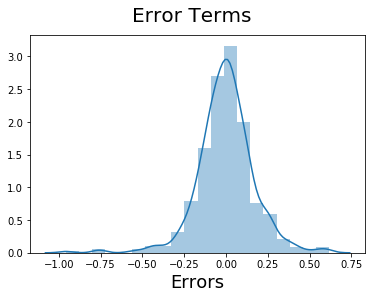

In [1092]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [1093]:
X_test[col]

FullBath_1  OverallQual_8  GarageQual_TA  GarageCond_TA  GarageCars_1  \
582          1.0            0.0            0.0            0.0           0.0   
242          1.0            0.0            0.0            1.0           1.0   
130          0.0            0.0            1.0            1.0           0.0   
425          1.0            0.0            1.0            1.0           1.0   
656          1.0            0.0            1.0            1.0           1.0   
606          1.0            0.0            1.0            1.0           0.0   
1272         1.0            0.0            1.0            1.0           1.0   
841          0.0            0.0            0.0            1.0           0.0   
1016         0.0            0.0            1.0            1.0           0.0   
1167         0.0            0.0            1.0            1.0           0.0   
152          0.0            0.0            1.0            1.0           0.0   
448          0.0            0.0            1.0            1.0           1.0   
976          1.0            0.0            0.0            0.0           0.0   
816          1.0            0.0            1.0            1.0           1.0   
617          1.0            0.0            1.0            1.0           0.0   
356          0.0            0.0            1.0            1.0           0.0   
801          1.0            0.0            1.0            1.0           0.0   
824          0.0            1.0            1.0            1.0           0.0   
968          1.0            0.0            0.0            0.0           0.0   
1064         1.0            0.0            1.0            1.0           0.0   
827          0.0            0.0            1.0            1.0           0.0   
61           1.0            0.0            1.0            1.0           1.0   
386          1.0            0.0            0.0            0.0           0.0   
1098         1.0            0.0            1.0            1.0           1.0   
486          1.0            0.0            1.0            1.0           0.0   
119          0.0            0.0            1.0            1.0           0.0   
1051         0.0            0.0            1.0            1.0           0.0   
1188         0.0            0.0            1.0            1.0           0.0   
1284         0.0            0.0            1.0            1.0           1.0   
1255         1.0            0.0            1.0            1.0           1.0   
...          ...            ...            ...            ...           ...   
619          0.0            1.0            1.0            1.0           0.0   
1114         1.0            0.0            1.0            1.0           1.0   
308          1.0            0.0            1.0            1.0           0.0   
1133         0.0            1.0            1.0            1.0           0.0   
1341         1.0            0.0            1.0            1.0           0.0   
522          0.0            0.0            1.0            1.0           0.0   
505          0.0            0.0            1.0            1.0           0.0   
925          0.0            0.0            1.0            1.0           0.0   
394          1.0            0.0            1.0            1.0           1.0   
441          0.0            0.0            0.0            0.0           0.0   
1224         0.0            0.0            1.0            1.0           0.0   
937          0.0            0.0            1.0            1.0           0.0   
1225         1.0            0.0            1.0            1.0           1.0   
921          0.0            0.0            0.0            0.0           0.0   
592          1.0            0.0            1.0            1.0           0.0   
62           0.0            1.0            1.0            1.0           0.0   
695          0.0            0.0            1.0            1.0           0.0   
34           0.0            0.0            1.0            1.0           0.0   
622          1.0            0.0            1.0          

In [1094]:
# Create the Tess

X_test = X_test[col]
X_test = X_test.drop('BedroomAbvGr_3',1)
X_test = X_test.drop('OverallCond_5',1)

In [1095]:
X_test_final = sm.add_constant(X_test)

In [1096]:
y_pred_final = lr_3.predict(X_test_final)

Text(0,0.5,'y_pred')

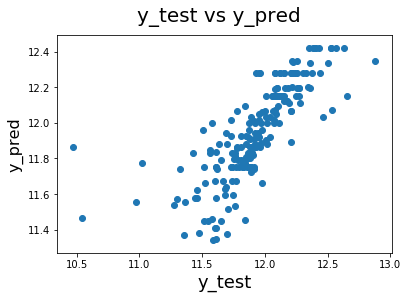

In [1097]:
# Plotting y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

Test Accuracy

In [1098]:
# Calculate the R_Score for the Test Set 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

0.60667697204112114

Train Accuracy

In [1099]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price)

0.69891828082703911

### Significant Variables

In [1100]:
col

40                   FullBath_1
14                OverallQual_8
68                GarageQual_TA
73                GarageCond_TA
60                 GarageCars_1
10                OverallQual_4
56    FireplaceQu_NoFirePlaceQu
13                OverallQual_7
7                   MSZoning_RL
44               BedroomAbvGr_2
20                OverallCond_5
11                OverallQual_5
45               BedroomAbvGr_3
Name: 0, dtype: object

In [1101]:
## Check the Summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     96.65
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          7.01e-112
Time:                        21:20:55   Log-Likelihood:                 163.77
No. Observations:                 470   AIC:                            -303.5
Df Residuals:                     458   BIC:                            -253.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Top 3 Variables and Linear Equation

### SalesPrice = OverallQual_8 x 0.2733 + GarageCond_TA x 0.1723 + OverallQual_7 x 0.1286